# Assignment 1 - ML Data Cleaning & Feature Selection

## Background

A tour & travels company is offering travel insurance package to their customers. The new insurance package also includes covid cover. The company wants to know which customers would be interested to buy it based on their database history. The insurance was offered to some of the customers in 2019 and the given data has been extracted from the performance/sales of the package during that period. The data is provided for almost 2000 of its previous customers and we are required to build an intelligent model that can predict if the customer will be interested to buy the travel insurance package.

## Information about the Dataset

##### What is our ultimate aim with this notebook?
- Our ultimate aim is to build a machine learning model that can predict if the customer will be interested in buying the travel insurance package based on certaing parameters. Before we create a model we need to do some data cleaning, feature selection and exploratory data analysis of the kaggle dataset.

<i><b>Kaggle Dataset Link: </b>  https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data</i>

***
#### Column Description for our Dataset
***
<b><i><u>Target Variable/Dependent Variable</u><i></b>
    
1. <b>TravelInsurance</b> - Did the customer buy travel insurance package during introductory offering held in the year 2019. This is the variable we have to predict

<b><i><u>Predictor Variables/Independent Variables </u><i></b>
1. <b>Unnamed: 0</b> - The row number
2. <b>Age</b> - Age of the customer
3. <b>Employment Type</b> - The sector in which customer is employed
4. <b>GraduateOrNot</b> - Whether the customer is college graduate or not
5. <b>AnnualIncome</b> - The yearly income of the customer in indian rupees[rounded to nearest 50 thousand rupees]
6. <b>FamilyMembers</b> - Number of members in customer's family
7. <b>ChronicDiseases</b> - Whether the customer suffers from any major disease or conditions like Diabetes/high BP or Asthama,etc
8. <b>FrequentFlyer</b> - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 years[2017-2019]
9. <b>EverTravelledAbroad</b> - Has the customer ever travelled to a foreign country

    


In [ ]:
#loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the dataset
data = pd.read_csv("TravelInsurancePrediction.csv")

In [ ]:
##Reading first 5 rows
data.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


> We are dropping "Unnamed: 0" as it has the row number which is not useful for our analysis

In [ ]:
#Dropping "Unnamed: 0"
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#Reading first 5 rows after dropping the first column
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
#Renaming Employment Type column to remove space and keep naming convention consistent
data = data.rename(columns={"Employment Type":"EmploymentType"})

In [ ]:
#Reading first 5 rows after renaming
data.head(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Text(0, 0.5, 'Chronic Disease')

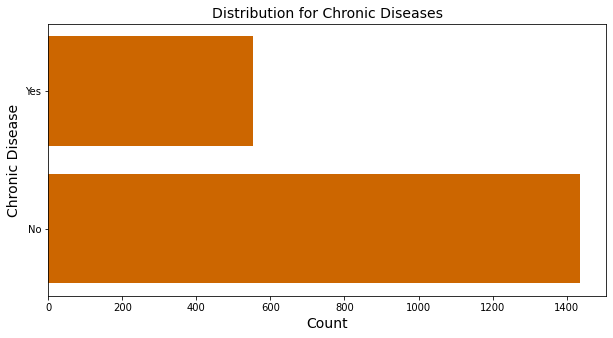

In [ ]:
#Checking if ChronicDiseases has 1 and 0 only(binary)
data['ChronicDiseases'].value_counts()
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['ChronicDiseases'].value_counts(), color ="#cc6600")
plt.title('Distribution for Chronic Diseases', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Chronic Disease", size =14)

Observations:
1. Chronic Diseases has only binary data so we are assuming that '1' means that the travellers has a chronic Disease and '0' means the traveller is free of any chronic disease.

In [ ]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [ ]:
#function for coverting yes/no to binary

def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [ ]:
#Converting ChronicDiseases to a Yes/No field for keeping it consistent with other Yes/No fields for our analysis  
data['ChronicDiseases'] = data['ChronicDiseases'].apply(convert_binary_to_yesno)

In [ ]:
#Reading first 5 rows after coversion
data.head(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


In [ ]:
# Temporarily converting our dependent variable to a Yes/No field to get a clear categorical & numerical column list
data['TravelInsurance'] = data['TravelInsurance'].apply(convert_binary_to_yesno)

<h2><i> Q1. What are the data types of our dataset variables?</i></h2>

In [ ]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Printing the list of categorical and numerical columns
print("--------------------------------------------------------")
print("                 Categorical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("--------------------------------------------------------")
print("                 Numerical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of num variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 6
1. EmploymentType
2. GraduateOrNot
3. ChronicDiseases
4. FrequentFlyer
5. EverTravelledAbroad
6. TravelInsurance


--------------------------------------------------------
                 Numerical Variables                  
--------------------------------------------------------
Total number of num variables in our dataset: 3
1. Age
2. AnnualIncome
3. FamilyMembers


<h2><i>Q2. Are there missing values? Which independent variables have missing data? How much?</h2></i>

In [ ]:
#Checking missing values in our data
data.isnull().sum()

Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

<u><b><i>Observations</i></b></u>
* We have 0% missing values both in our independent variables as well as dependent variable

In [ ]:
# Splitting our dataset into two dataframes - 1. Predictor Variables 2. Target Variable
y = data['TravelInsurance']
x = data.drop('TravelInsurance', axis = 1)
data_total = data

<h2><i>Q3. What are the likely distributions of the numeric variables?</h2></i>

For our analysis we will be exploring categorical variables as well in this section

#### 1. Age

The mean of Age is  29.65
The median of Age is  29.0
The Mode of Age is  0    28
dtype: int64


Text(0.5, 1.0, 'Distribution curve for Age')

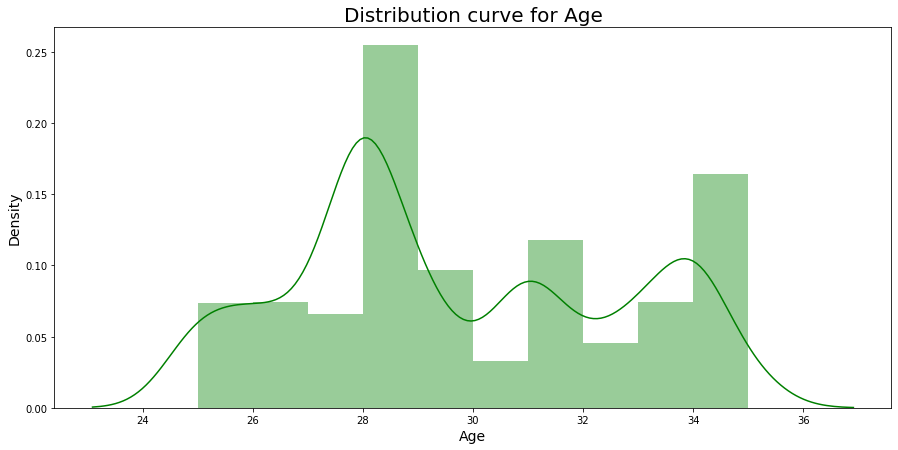

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Age'], bins=10, color = "green")
print("The mean of Age is ",round(data['Age'].mean(),2))
print("The median of Age is ",data['Age'].median())
print("The Mode of Age is ",data['Age'].mode())
plt.xlabel("Age", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Age', size=20)

Observations-
1. The mean and median are almost similar
2. The density of people with age 28 is the highest
3. The age range lies between 25 - 35 years

#### 2. Annual Income

The mean income is  932762.96
The median income is  900000.0


Text(0.5, 1.0, 'Distribution curve for Annual Income')

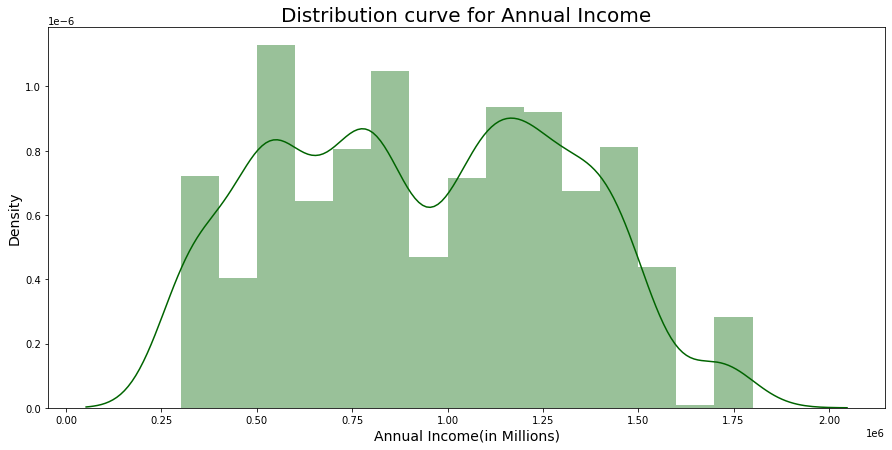

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['AnnualIncome'], color = "darkgreen")
print("The mean income is ",round(data['AnnualIncome'].mean(),2))
print("The median income is ",data['AnnualIncome'].median())
plt.title('Distribution curve for Annual Income')
plt.xlabel("Annual Income(in Millions)", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Annual Income', size=20)

Observations:
1. As per the graph the income distribution follows modified normal distribution
2. There is a significant drop in the number of people from an income greater than 1.6M to 1.8M
3. Here also the mean and median are almost the same

#### 3. Family Members

Average family members for a traveller is  4.75
The median of family members is  5.0
The mode of family members is  0    4
dtype: int64


Text(0.5, 1.0, 'Distribution curve for FamilyMembers')

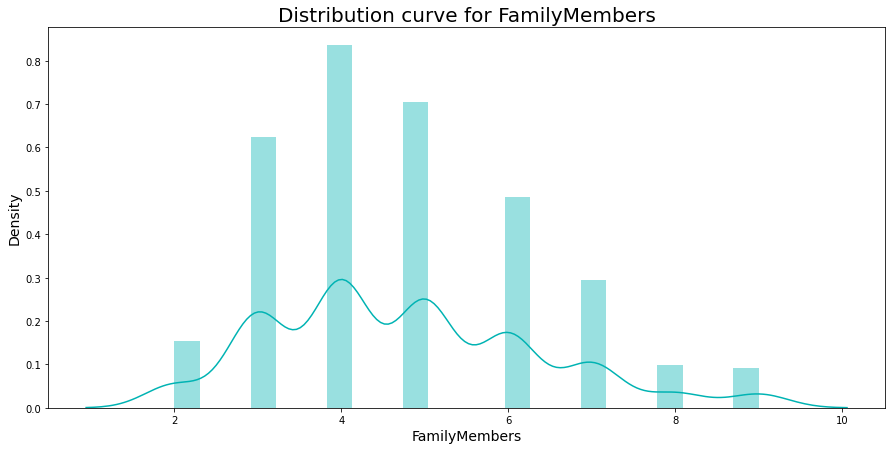

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['FamilyMembers'], color = "#00b3b3")
print("Average family members for a traveller is ",round(data['FamilyMembers'].mean(),2))
print("The median of family members is ",data['FamilyMembers'].median())
print("The mode of family members is ",data['FamilyMembers'].mode())
plt.xlabel("FamilyMembers", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for FamilyMembers', size=20)

Observations:
1. Average number of family members for the ones travelling is around 4
2. We have atleast 2 family members for any traveller with maximum of 9 members for 10% of the travellers
3. Travellers that have 8 or 9 family members are low in our dataset which might mean that travellers with big families don't travel that often

#### 4. Employment Type

Text(0.5, 0, 'No of Appearances')

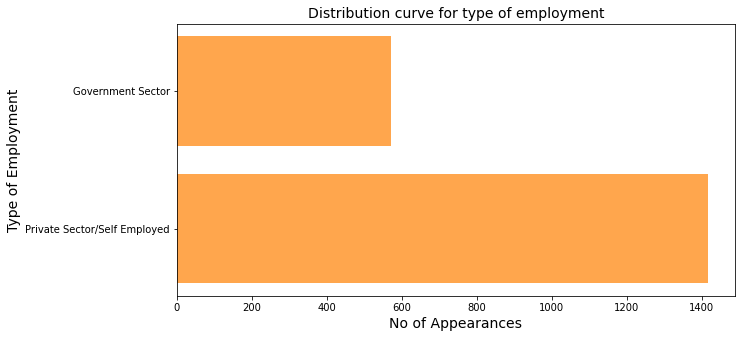

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(['Private Sector/Self Employed','Government Sector'],data['EmploymentType'].value_counts(), color = "#ffa64d")
plt.title('Distribution curve for type of employment', size=14)
plt.ylabel("Type of Employment", size=14)
plt.xlabel("No of Appearances", size=14)

Insights from the distribution graph above:

1. There are only two categories of employment type of travellers in our dataset - Private Sector and Government Sector 
2. No of private sector travellers are almost double of Government sector travellers

#### 5. GraduateOrNot

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
14.846502264720684


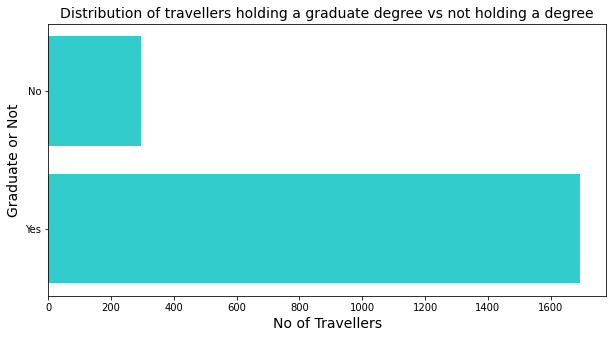

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(['Yes','No'],data['GraduateOrNot'].value_counts(), color="#33cccc")
plt.title('Distribution of travellers holding a graduate degree vs not holding a degree', size=14)
plt.ylabel("Graduate or Not", size=14)
plt.xlabel("No of Travellers", size=14)
print(data['GraduateOrNot'].value_counts())
print(295/1987*100)

Observations:
1. ~85% of the travellers in our dataset hold a graduate degree

#### 6. FrequentFlyers

No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

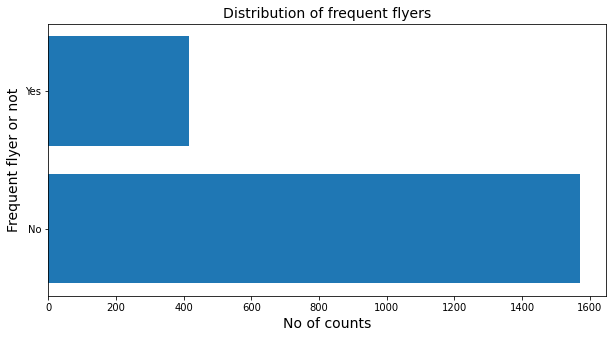

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['FrequentFlyer'].value_counts())
plt.title('Distribution of frequent flyers', size=14)
plt.ylabel("Frequent flyer or not", size=14)
plt.xlabel("No of counts", size=14)
data['FrequentFlyer'].value_counts()

Observations:
* More than 60% of the travellers do not travel than often so we will have to check if they would even consider opting for a travel insurance

#### 7. ChronicDiseases

Text(0, 0.5, 'Chronic Disease')

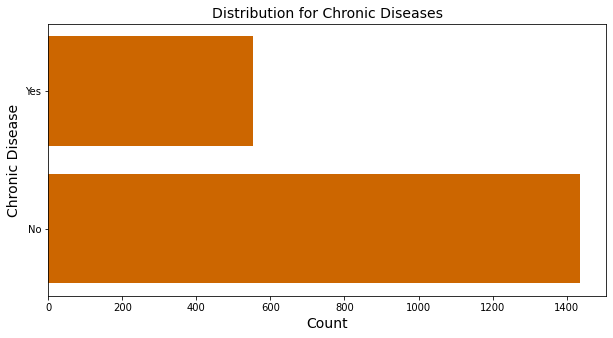

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['ChronicDiseases'].value_counts(), color ="#cc6600")
plt.title('Distribution for Chronic Diseases', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Chronic Disease", size =14)

Observations:
* Majority of the travellers do not have any chronic disease

#### 8. EverTravelledAbroad

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


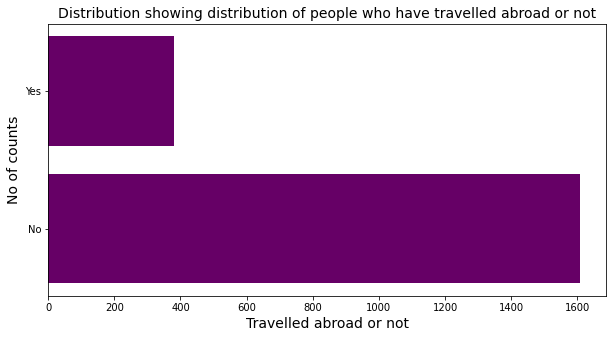

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['EverTravelledAbroad'].value_counts(), color ="#660066")
plt.title('Distribution showing distribution of people who have travelled abroad or not', size =14)
plt.xlabel("Travelled abroad or not", size =14)
plt.ylabel("No of counts", size =14)
print(data['EverTravelledAbroad'].value_counts())

Observations:
1. Only 20% of the travellers have a travel history travelling abroad
***

Before we move further, we need to do some data cleaning for our analysis and also for building the model.

* We will covert 'Yes/No' to 1/0 - GraduateOrNot, FrequentFlyer, EverTravelledAbroad, ChronicDiseases,TravelInsurance

* For employment type we will follow the rule: Governemnt Sector -> 1, Private Sector -> 0

In [ ]:
# Coverting our independent categorical variables from Yes/No to Binary
x['GraduateOrNot'] = x['GraduateOrNot'].apply(convert_yesno_to_binary)
x['FrequentFlyer'] = x['FrequentFlyer'].apply(convert_yesno_to_binary)
x['EverTravelledAbroad'] = x['EverTravelledAbroad'].apply(convert_yesno_to_binary)
x['ChronicDiseases'] = x['ChronicDiseases'].apply(convert_yesno_to_binary)

# Converting the target variable from Yes/No to Binary
y = y.apply(convert_yesno_to_binary)

In [ ]:
#function for converting Employement type to binary

def convert_employmenttype_to_binary(employmenttype):
    if employmenttype == "Government Sector":
        return 1
    else:
        return 0

In [ ]:
# Converting EmployementType to Binary
x['EmploymentType'] = x['EmploymentType'].apply(convert_employmenttype_to_binary)

In [ ]:
# Reading our independent variables dataframe after data preparation
x.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


<h2><i>Q4. Do the range of the predictor variables make sense? Q5. Remove outliers and keep outliers?</i></h2>

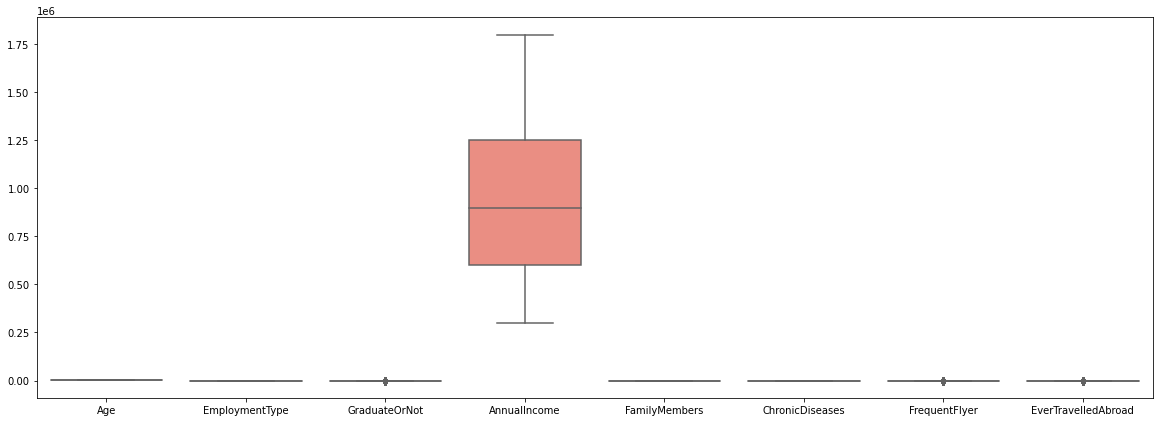

In [ ]:
#Checking the range of the predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")

<b>Observations:</b>
* The range of AnnualIncome is way too high as compared to other predictor variables. Therefore, we are not able to visualize the ranges for other predictor variables.

<b>So what should be do next to visualize ranges of other predictor variables?</b>
* We will plot the charts separately to get the ranges of each one of them

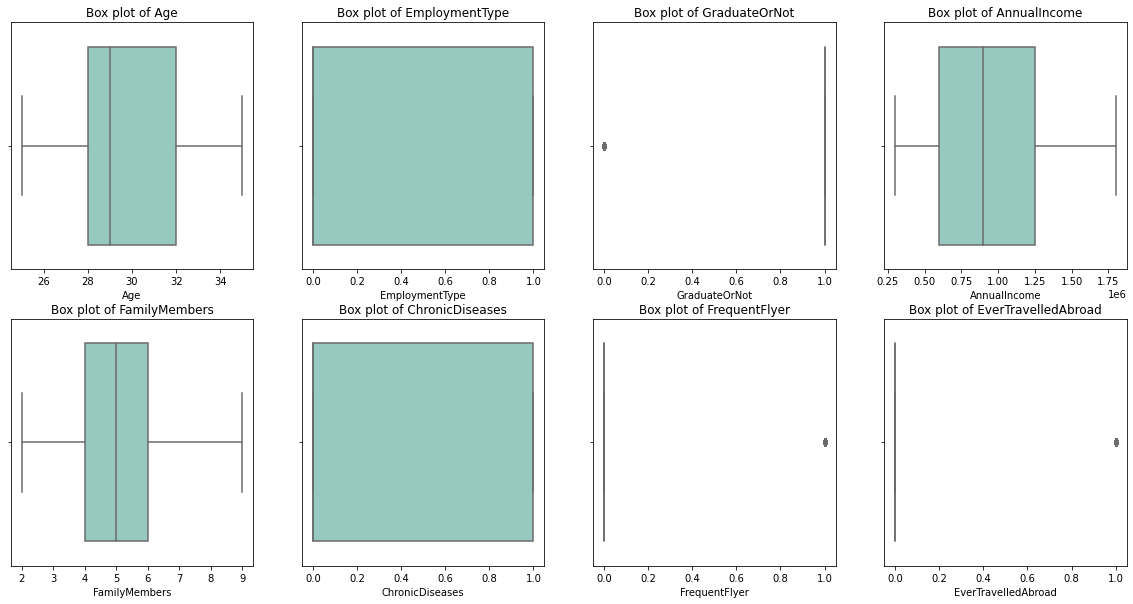

In [ ]:
#Checking the Ranges of the predictor variables individually
cols = list(x.columns)
f, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Set3')
plt.show()

Observations:
* Majority of the travellers have an age greater than the median age of ~29 years
* No of family above and below the median is almost same
* The income group appears to be normally distributed as the 25-50 percentile and 50-75% have almost similar area
* Number of travellers without a Graduate degree is low
* Number of travellers who are frequent flyers or have travelled abroad is also low
* <b><i>There are no outliers in our dataset.</i></b> For GraduateOrNot, FrequentFlyer and EvertravelledAbroad charts, one category like Yes is more than 50% then the other but they can't be considered as outliers

##### Normalizing the dataset
* We need to scale our numerical columns. Although we can use any scaling technique, we will be using normalization as we want to have values in the range of [0,1] and also to detect outliers as normalization is highly affected my outliers


In [ ]:
# list of numerical columns which require normalization
num_cols=['AnnualIncome','Age', 'FamilyMembers']

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [ ]:
# Checking our predictor variables after normalization
x.describe()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.465023,0.286865,0.851535,0.421842,0.393271,0.277806,0.209864,0.191243
std,0.291331,0.452412,0.355650,0.251237,0.229950,0.448030,0.407314,0.393379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.000000,1.000000,0.200000,0.285714,0.000000,0.000000,0.000000
50%,0.400000,0.000000,1.000000,0.400000,0.428571,0.000000,0.000000,0.000000
75%,0.700000,1.000000,1.000000,0.633333,0.571429,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
* We can see that the numerical variables - age, annual income and family members are now in the range of 0 to 1

Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

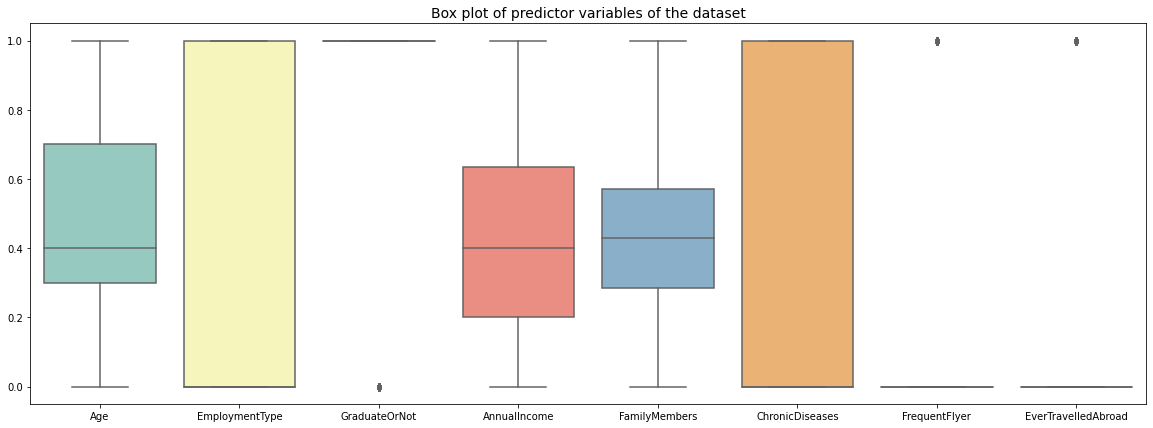

In [ ]:
#Checking the Ranges of the predictor variables together after normalization of numerical variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

<h2><i>Q6. Are the predictor variables independent of all other predictor variables?</i></h2>

In [ ]:
# Lets check the correlation among the predictor variables using a correlation matrix
x.corr()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
Age,1.000000,0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779
EmploymentType,0.115134,1.000000,0.127133,-0.349157,0.003354,0.011553,-0.143790,-0.181098
GraduateOrNot,0.027125,0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683
AnnualIncome,-0.020101,-0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043
FamilyMembers,0.027409,0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755
ChronicDiseases,0.007359,0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238
FrequentFlyer,-0.033159,-0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334
EverTravelledAbroad,-0.012779,-0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000


Observations:
* At first glance we can see that that the variables have very less collinearity. To visualize the values lets check the heatmap next

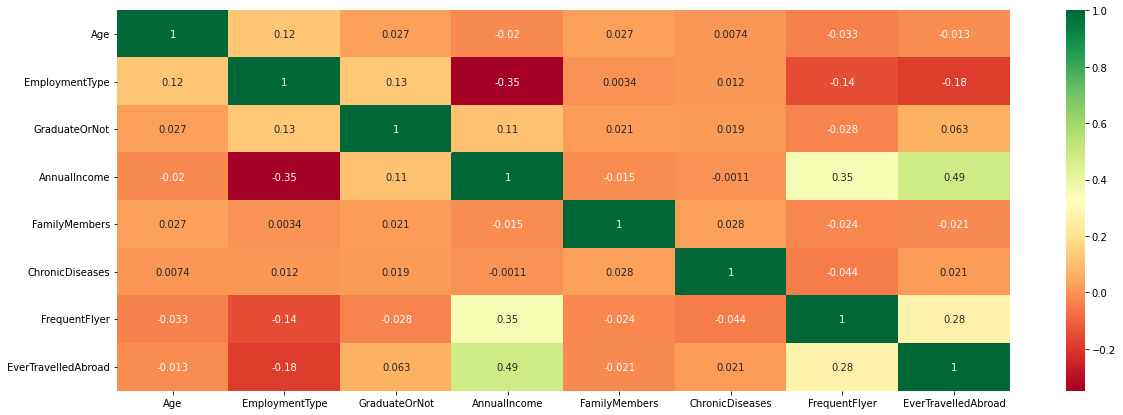

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

Observations:
* It is very clear from the heatmap that most of the variables are not dependent on each other
* Degree of collinearity is significantly less that 0.1 for most variables
* The Annual income and the international travel history of the travellers have a degree of collinearity of 0.49

#### Creating a Train - Test split for our model training and predictions

In [ ]:
from sklearn.model_selection import  train_test_split

#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


<h2><i>Q7. Do the training and test sets have the same data?</i></h2>

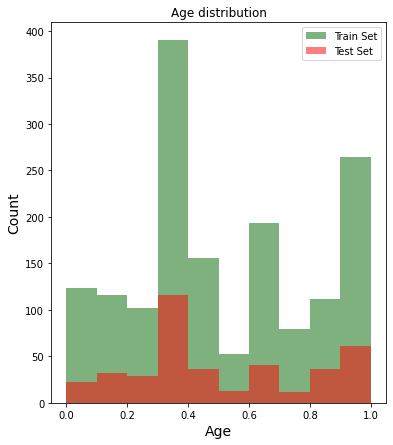

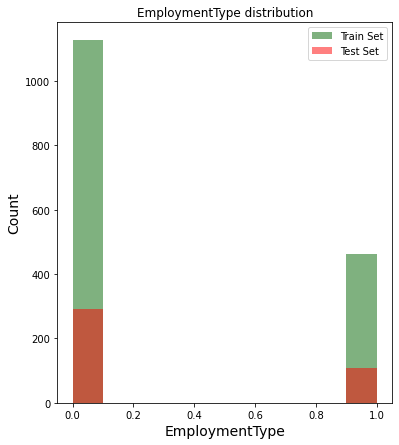

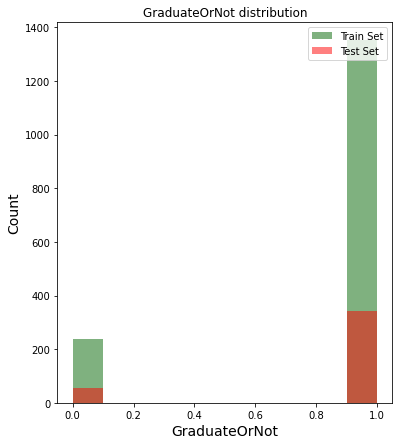

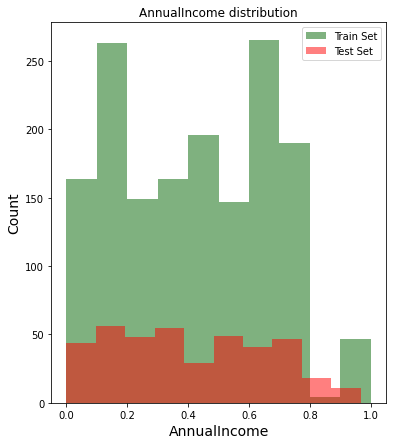

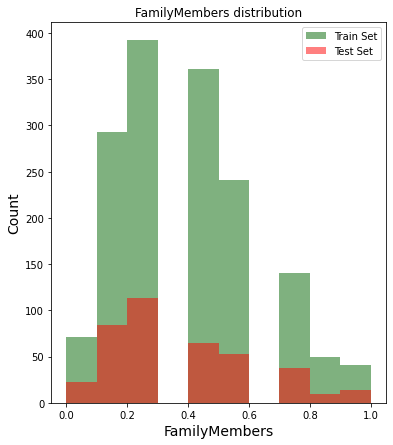

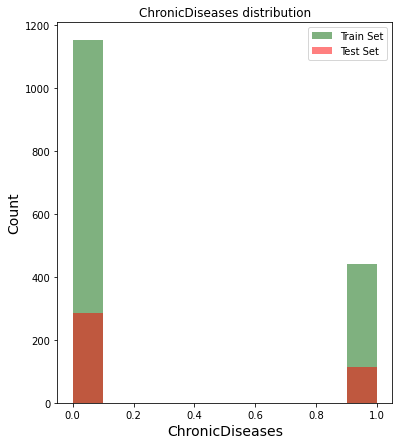

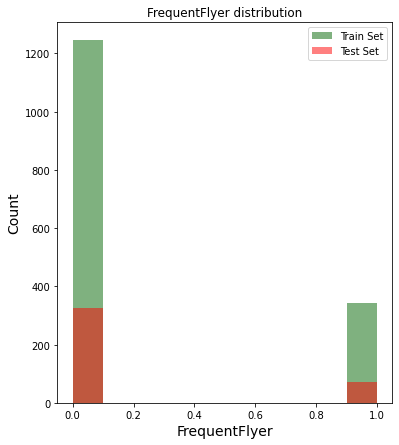

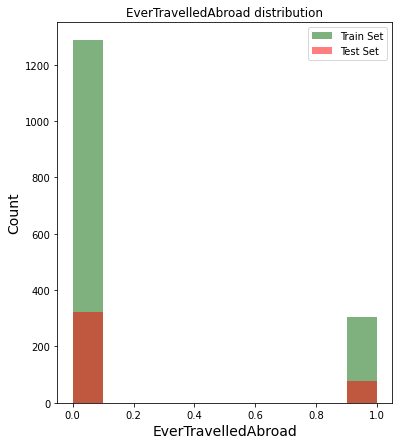

In [ ]:
# Looking the data for test and training set
X_test_plot = X_test
X_train_plot = X_train

#Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(6,7))
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()


 

Observations:
* The ratio of 80%-20% for train-test split appears to be distributed correctly for all the variables except for Annual Income
* For Annual Income, from 0.8 - 0.9, the count of test instances is more than the count of train instances. For the rest of the counts, test count is lower than the train count

<h2><i>Q8. Which predictor variables are the most useful to predict a target?</i></h2>
<h4>Method 1 - Using Ordinary Least Squares(OLS) Regression</h4>

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model1 = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TravelInsurance   R-squared (uncentered):                   0.513
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                              208.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                   5.03e-241
Time:                        01:25:58   Log-Likelihood:                         -860.73
No. Observations:                1589   AIC:                                      1737.
Df Residuals:                    1581   BIC:                                      1780.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.1062      0.034      3.163      0.002       0.040       0.172
EmploymentType         -0.0260      0.025     -1.058      0.290      -0.074       0.022
GraduateOrNot          -0.0335      0.026     -1.289      0.198      -0.084       0.017
AnnualIncome            0.4338      0.048      9.104      0.000       0.340       0.527
FamilyMembers           0.1734      0.041      4.181      0.000       0.092       0.255
ChronicDiseases         0.0217      0.023      0.933      0.351      -0.024       0.067
FrequentFlyer           0.0803      0.027      2.926      0.003       0.026       0.134
EverTravelledAbroad     0.3549      0.030     11.725      0.000       0.296       0.414
==============================================================================
Omnibus:                      141.412   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.001
Skew:                           0.682   Prob(JB):                     8.86e-32
Kurtosis:                       2.452   Cond. No.                         6.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will consider a significance value of <b>0.05</b> for determining the significance of our predictor variables which means if 
* p value is greater that 0.05 - feature is not significant for predicting the target variable
* p value is less than 0.05 - feature is significant for predicting the target variable

Observations:
* Age has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
* EmployeeType has a p-value of 0.6 which is greater than 0.05 so it is not a significant feature
* GraduateOrNot has a p-value of 0.09 which is greater than 0.05 so it is not a significant feature
* AnnualIncome has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
* FamilyMembers has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
* ChronicDiseases has a p-value of 0.5 which is greater than 0.05 so it is not a significant feature
* FrequentFlyer has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
* EverTravelledAbroad has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature

In [ ]:
print("Summary of OLS Regression results:")
print("--------------------------------------------------------")
print("          Significant Variables              ")
print("--------------------------------------------------------")
print("1. Age" + "\n" + "2. AnnualIncome" + "\n" + "3. FamilyMembers" + "\n" + "4. FrequentFlyer" + "\n" + "5. EverTravelledAbroad")
print("--------------------------------------------------------")
print("          Non - significant Variables          ")
print("--------------------------------------------------------")
print("1. EmployeeType" + "\n" + "2. GraduateOrNot" + "\n" + "3. ChronicDiseases")

Summary of OLS Regression results:
--------------------------------------------------------
          Significant Variables              
--------------------------------------------------------
1. Age
2. AnnualIncome
3. FamilyMembers
4. FrequentFlyer
5. EverTravelledAbroad
--------------------------------------------------------
          Non - significant Variables          
--------------------------------------------------------
1. EmployeeType
2. GraduateOrNot
3. ChronicDiseases


***

<h4>Method 2 - Using Logistic Regression Results</h4>

In [ ]:
model2 = sd.Logit(y_train,X_train).fit()
print(model2.summary())


Optimization terminated successfully.
         Current function value: 0.568056
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1589
Model:                          Logit   Df Residuals:                     1581
Method:                           MLE   Df Model:                            7
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.1272
Time:                        01:25:59   Log-Likelihood:                -902.64
converged:                       True   LL-Null:                       -1034.2
Covariance Type:            nonrobust   LLR p-value:                 4.624e-53
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.2326      0.182     -1.275      0.202      -0.590       0.125
Em

We will consider a significance value of <b>0.05</b> for determining the significance of our predictor variables which means if 
* p value is greater that 0.05 - feature is not significant for predicting the target variable
* p value is less than 0.05 - feature is significant for predicting the target variable
* We do see some difference in the significance of certain features which might be because of small size of our dataset

In [ ]:
print("Summary of Logistic Regression results:")
print("--------------------------------------------------------")
print("          Significant Variables               ")
print("--------------------------------------------------------")
print("1. Age" + "\n" + "2. AnnualIncome" + "\n" + "3. FamilyMembers" + "\n" + "4. FrequentFlyer" + "\n" + "5. EverTravelledAbroad")
print("--------------------------------------------------------")
print("          Non - significant Variables          ")
print("--------------------------------------------------------")
print("1. EmployeeType" + "\n" + "2. GraduateOrNot" + "\n" + "3. ChronicDiseases")

Summary of Logistic Regression results:
--------------------------------------------------------
          Significant Variables               
--------------------------------------------------------
1. Age
2. AnnualIncome
3. FamilyMembers
4. FrequentFlyer
5. EverTravelledAbroad
--------------------------------------------------------
          Non - significant Variables          
--------------------------------------------------------
1. EmployeeType
2. GraduateOrNot
3. ChronicDiseases


<h4>Method 3 - Using Gradient Boosting Classifier Results</h4>

Text(0.5, 1.0, 'Feature Importance ')

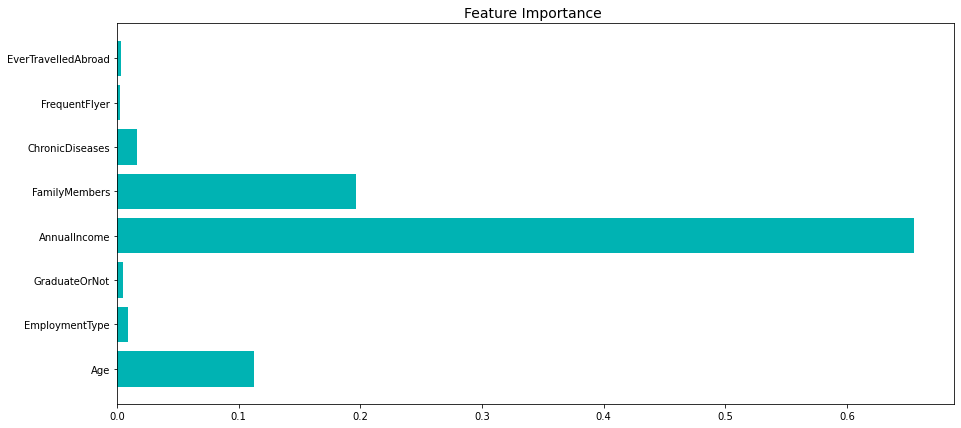

In [ ]:
from sklearn import ensemble
model_3=ensemble.GradientBoostingClassifier()
model_3.fit(X_train,y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_3.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance ', size=14)

Observations:
* Using gradient boosting method also we get similar results as the previous two methods with our numerical columns(age, family members and annual income) having noticable significance.

In [ ]:
#Understanding the important features 
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_3, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Weight,Feature
0.2251 ± 0.0311,AnnualIncome
0.0588 ± 0.0093,Age
0.0573 ± 0.0181,FamilyMembers
0.0025 ± 0.0000,FrequentFlyer
0.0015 ± 0.0051,EverTravelledAbroad
0.0005 ± 0.0080,ChronicDiseases
0.0005 ± 0.0020,GraduateOrNot
0.0000 ± 0.0055,EmploymentType


Observations:
* From the graph we can see that Annual Income, Family Members and Age appear to be the most significant features
* All other variables are more or less at significanct level, quite low as compared to Income, age and no of family members

<h2><i>Q9. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?</i></h2>

#### Creating 1%, 5%, and 10% missing values in our dataset

In [ ]:
# Coverting our independent categorical variables from Yes/No to Binary
data_total['GraduateOrNot'] = data_total['GraduateOrNot'].apply(convert_yesno_to_binary)
data_total['FrequentFlyer'] = data_total['FrequentFlyer'].apply(convert_yesno_to_binary)
data_total['EverTravelledAbroad'] = data_total['EverTravelledAbroad'].apply(convert_yesno_to_binary)
data_total['ChronicDiseases'] = data_total['ChronicDiseases'].apply(convert_yesno_to_binary)
data_total['TravelInsurance'] = data_total['TravelInsurance'].apply(convert_yesno_to_binary)
# Converting EmployementType to Binary
data_total['EmploymentType'] = data_total['EmploymentType'].apply(convert_employmenttype_to_binary)
# list of numerical columns which require normalization
num_cols=['AnnualIncome','Age', 'FamilyMembers']

# Importing required library from sklearn for normalization
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
data_total[feature_to_scale] = min_max_scaler.fit_transform(data_total[feature_to_scale])
data_total.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,1,1,0.066667,0.571429,1,0,0,0
1,0.6,0,1,0.633333,0.714286,0,0,0,0
2,0.9,0,1,0.133333,0.285714,1,0,0,1
3,0.3,0,1,0.266667,0.142857,1,0,0,0
4,0.3,0,1,0.266667,0.857143,1,1,0,0


In [ ]:
percent=[0.01,0.05,0.1]
train_data = data_total.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)
    
#creating new dataframe with 1%,5% and 10% missing values    
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

In [ ]:
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

Number of missing values
1% missing 19
5% missing 99
10% missing 198


,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,1.0,1.0,0.066667,0.571429,1.0,0.0,0.0,0.0
1,0.6,0.0,1.0,0.633333,0.714286,0.0,0.0,0.0,0.0
2,0.9,0.0,1.0,0.133333,0.285714,1.0,0.0,0.0,1.0
3,0.3,0.0,1.0,0.266667,0.142857,1.0,0.0,0.0,0.0
4,0.3,0.0,1.0,0.266667,0.857143,1.0,1.0,0.0,0.0


### Imputation Method 1: Dropping rows with  NaN values

In [ ]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1968 non-null   float64
 1   EmploymentType       1968 non-null   float64
 2   GraduateOrNot        1968 non-null   float64
 3   AnnualIncome         1968 non-null   float64
 4   FamilyMembers        1968 non-null   float64
 5   ChronicDiseases      1968 non-null   float64
 6   FrequentFlyer        1968 non-null   float64
 7   EverTravelledAbroad  1968 non-null   float64
 8   TravelInsurance      1968 non-null   float64
dtypes: float64(9)
memory usage: 153.8 KB


In [ ]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm
# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.82
AUC: 0.77
Log Loss: 6.25
Confusion Matrix:
 [[300   6]
 [ 83 103]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.83
AUC: 0.78
Log Loss: 5.71
Confusion Matrix:
 [[293  10]
 [ 68 101]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.83
AUC: 0.75
Log Loss: 6.01
Confusion Matrix:
 [[289   5]
 [ 73  81]]

-------------------------------


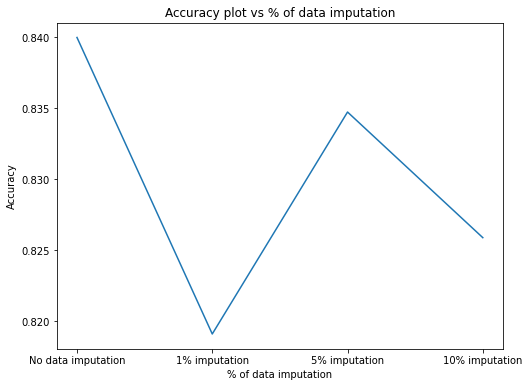

In [ ]:
model_firssthand_accuracy = 0.84
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputation')
plt.plot(label,accuracy)

Observations:
* We can clearly observe that when we remove 1% of data there is a significant drop in accuracy
* The accuracy increases from 1% to 5% and then drops again after 10% imputation of data which means that after dropping too less or too many rows from the dataset we are lossing some valuable information necessary for our prediction 
* Our dataset orginally has less rows and drop in accuracy means we are loosing on a lot of valuable information using this imputation technique

### Imputation Method 2 : Impute Numerical values with Median and Categorical value with Mode

In [ ]:
num_cols=['Age','FamilyMembers','AnnualIncome']
cat_cols=['EmploymentType','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance']
predict_impute_1=pd.DataFrame()
predict_impute_5=pd.DataFrame()
predict_impute_10=pd.DataFrame()
for col in num_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())
for col in cat_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_1_percent[col].mode())

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.82
AUC: 0.77
Log Loss: 6.25
Confusion Matrix:
 [[300   6]
 [ 83 103]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.83
AUC: 0.78
Log Loss: 5.71
Confusion Matrix:
 [[293  10]
 [ 68 101]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.83
AUC: 0.75
Log Loss: 6.01
Confusion Matrix:
 [[289   5]
 [ 73  81]]

-------------------------------


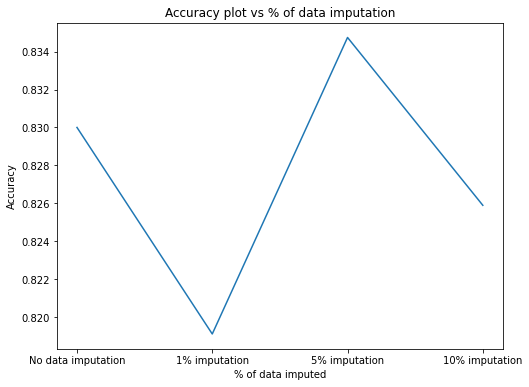

In [ ]:
model_firssthand_accuracy = 0.83
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

Observations:
* After doing median and mode imputation of missing values, here also we see that the accuracy keeps on increases from 1% to 5% and then drops after more data imputation
* Our dataset orginally has less rows and drop in accuracy means we are loosing on a lot of valuable information

### Imputation Method 3 : Impute using KNN imputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

predictors=predict_impute_1.drop('TravelInsurance',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('TravelInsurance',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('TravelInsurance',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
predict_impute_1 = predict_impute_1.dropna()
predict_impute_5 = predict_impute_5.dropna()
predict_impute_10 = predict_impute_10.dropna()

predictors=predict_impute_1.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_5.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_10.drop('TravelInsurance',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['TravelInsurance'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.76
AUC: 0.71
Log Loss: 8.25
Confusion Matrix:
 [[289   4]
 [114  87]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.80
AUC: 0.70
Log Loss: 6.85
Confusion Matrix:
 [[318   3]
 [ 92  66]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.78
AUC: 0.69
Log Loss: 7.53
Confusion Matrix:
 [[302   4]
 [ 98  64]]

-------------------------------


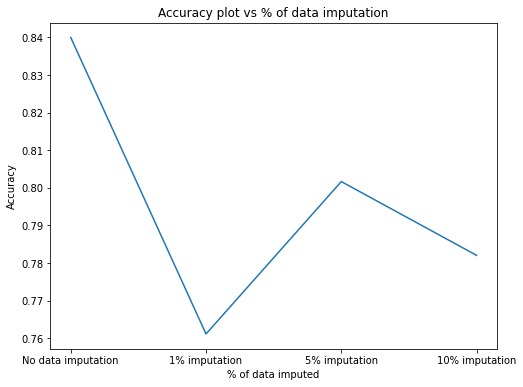

In [ ]:
model_firssthand_accuracy = 0.84
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

Observations:
* With this technique, we first observe a decrease in accuracy after 1% data imputation 
* There is an increase in accuracy after 5% data imputation followed by a little decrease in accuracy after 10% imputation
* The accuracy for all the imputation techniques is less than the base model's accuracy

***
## Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

* Owner - AI Skunkworks
* Link - https://github.com/aiskunks/Skunks_Skool
<br></br>
* Author name - Prof Nik Bear Brown
* Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

* Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
* Link - https://seaborn.pydata.org


***
## Licensing

Copyright 2022 Ankit Goyal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.